# Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

# Load dataset

In [3]:
#Read the data
Toyota = pd.read_csv("C:\\Users\\hp\\Desktop\\ToyotaCorolla.csv")
Toyota.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


## 1. EDA

In [5]:
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
Toyota1=pd.get_dummies(Toyota,dtype=int)
Toyota1.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0


In [9]:
#check for missing values
Toyota1.isna().sum()

Price               0
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_CNG       0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

# Correlation Matrix

In [11]:
Toyota1.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198,-0.039536,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,0.002389,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,0.144016,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,0.062109,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,0.001486,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.005941,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,0.009680,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,-0.049537,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000,0.052756,0.568087,-0.560470


In [13]:
Toyota2=Toyota1.drop(['Doors','Gears','Cylinders','cc','Automatic','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol'],axis=1)
Toyota2.head()

,Price,Age_08_04,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170


In [15]:
Toyota3=Toyota2.rename(columns={'Age_08_04':'Age'})
Toyota3.head()

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170


In [17]:
Toyota3.describe()

,Price,Age,KM,HP,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1615.00000


In [19]:
Toyota3.corr()

,Price,Age,KM,HP,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.089614
Weight,0.581198,-0.470253,-0.028598,0.089614,1.000000


# Data visualization

<Axes: >

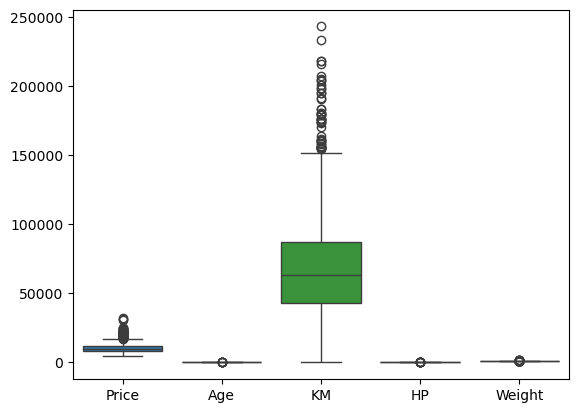

In [21]:
sns.boxplot(Toyota3)

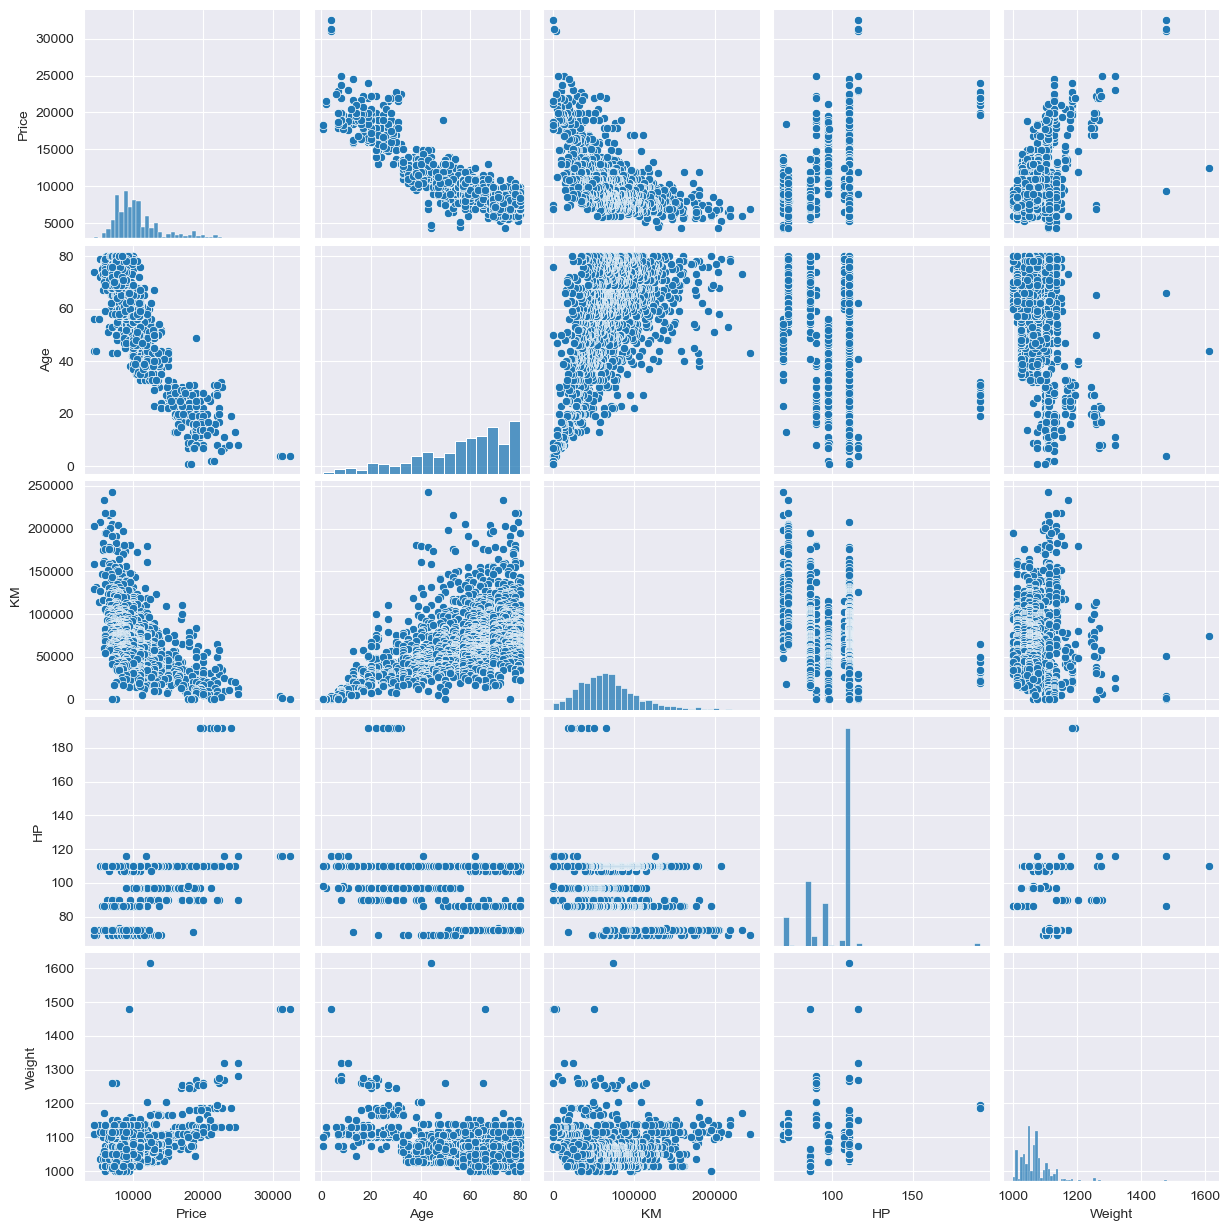

In [23]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Toyota3)
plt.show()

## 2. Split the dataset

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
train,test=train_test_split(Toyota3,test_size=0.3,random_state=7)
print(train.shape,test.shape)

(1005, 5) (431, 5)


## 3. Preparing a model

In [29]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+Weight',data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1433.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:03:20   Log-Likelihood:                -8673.5
No. Observations:                1005   AIC:                         1.736e+04
Df Residuals:                    1000   BIC:                         1.738e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    305.9645   1158.355      0.264      0.792   -1967.121    2579.050
Age         -127.9909      3.156    -40.552      0.000    -134.185    -121.797
KM            -0.0178      0.001    -11.908      0.000      -0.021      -0.015
HP            33.3379      3.181     10.481      0.000      27.096      39.580
Weight        14.3575      0.997     14.404      0.000      12.401      16.314
==============================================================================
Omnibus:                       98.803   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.037
Skew:                          -0.263   Prob(JB):                    4.38e-114
Kurtosis:                       6.491   Cond. No.                     2.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
predictions=model.predict(train)
predictions
actual=train.Price
errors=actual-predictions
pred_actual=pd.DataFrame(predictions,columns=["prediction"])
pred_actual["actual"]=actual
pred_actual["errors"]=errors
pred_actual

,prediction,actual,errors
1354,7868.884941,9450,1581.115059
1402,7279.534526,10500,3220.465474
395,11208.626383,9000,-2208.626383
530,11258.697151,9950,-1308.697151
399,9868.915799,10750,881.084201
...,...,...,...
211,14058.889852,14750,691.110148
502,11100.449389,9900,-1200.449389
537,11014.846515,9550,-1464.846515
1220,8651.026671,7900,-751.026671


# Residual Analysis

In [33]:
errors.mean()

-1.2631026219428328e-10

<Axes: ylabel='Density'>

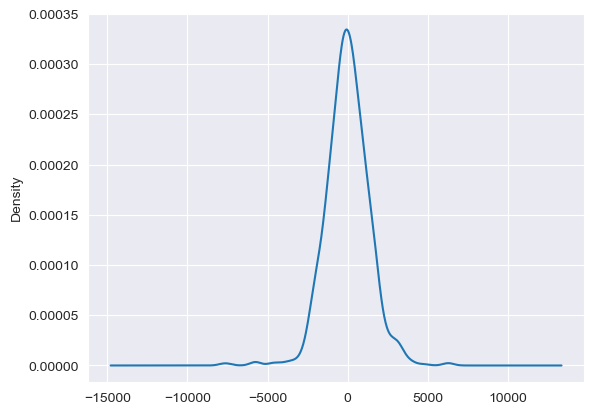

In [35]:
model.resid.plot(kind='kde')

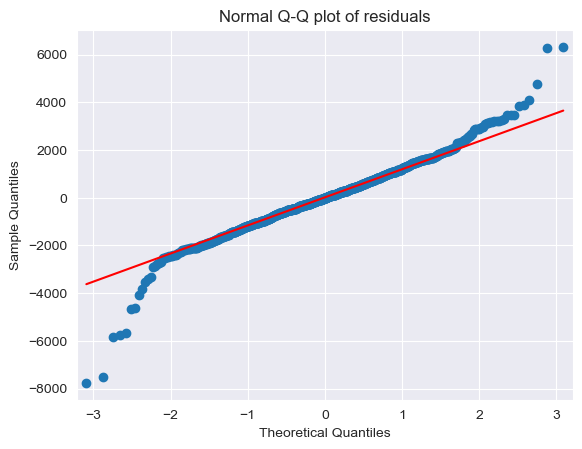

In [37]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

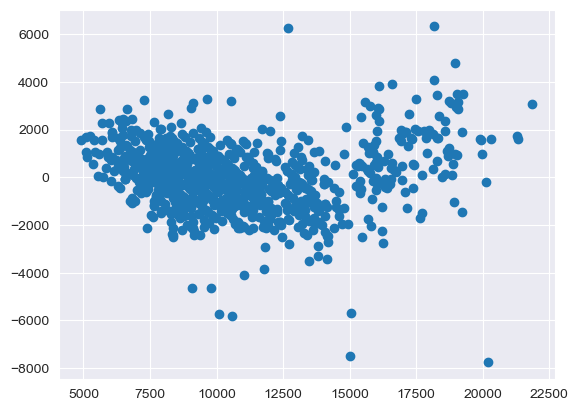

In [39]:
plt.scatter(model.fittedvalues,model.resid)

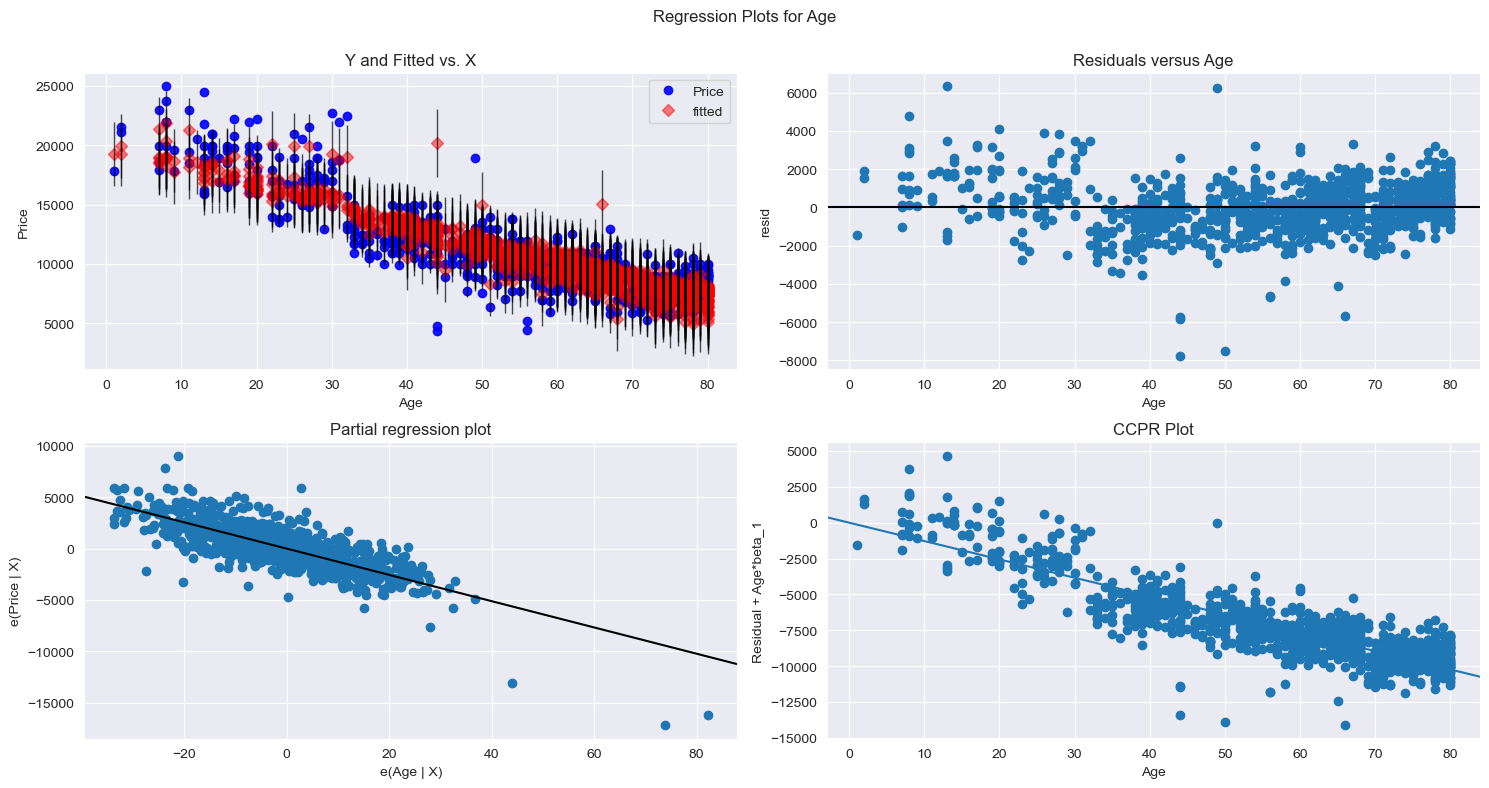

In [41]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

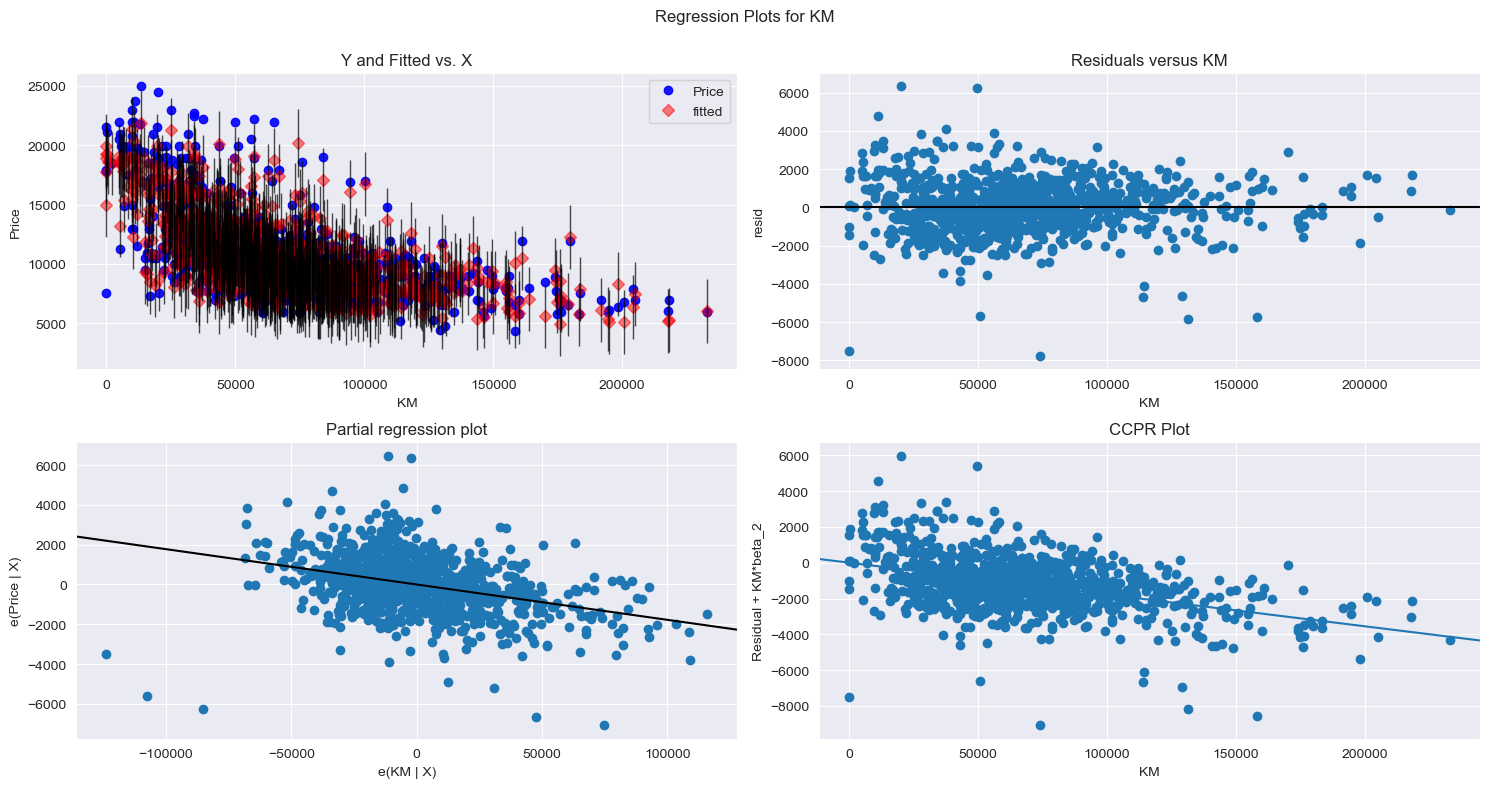

In [43]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

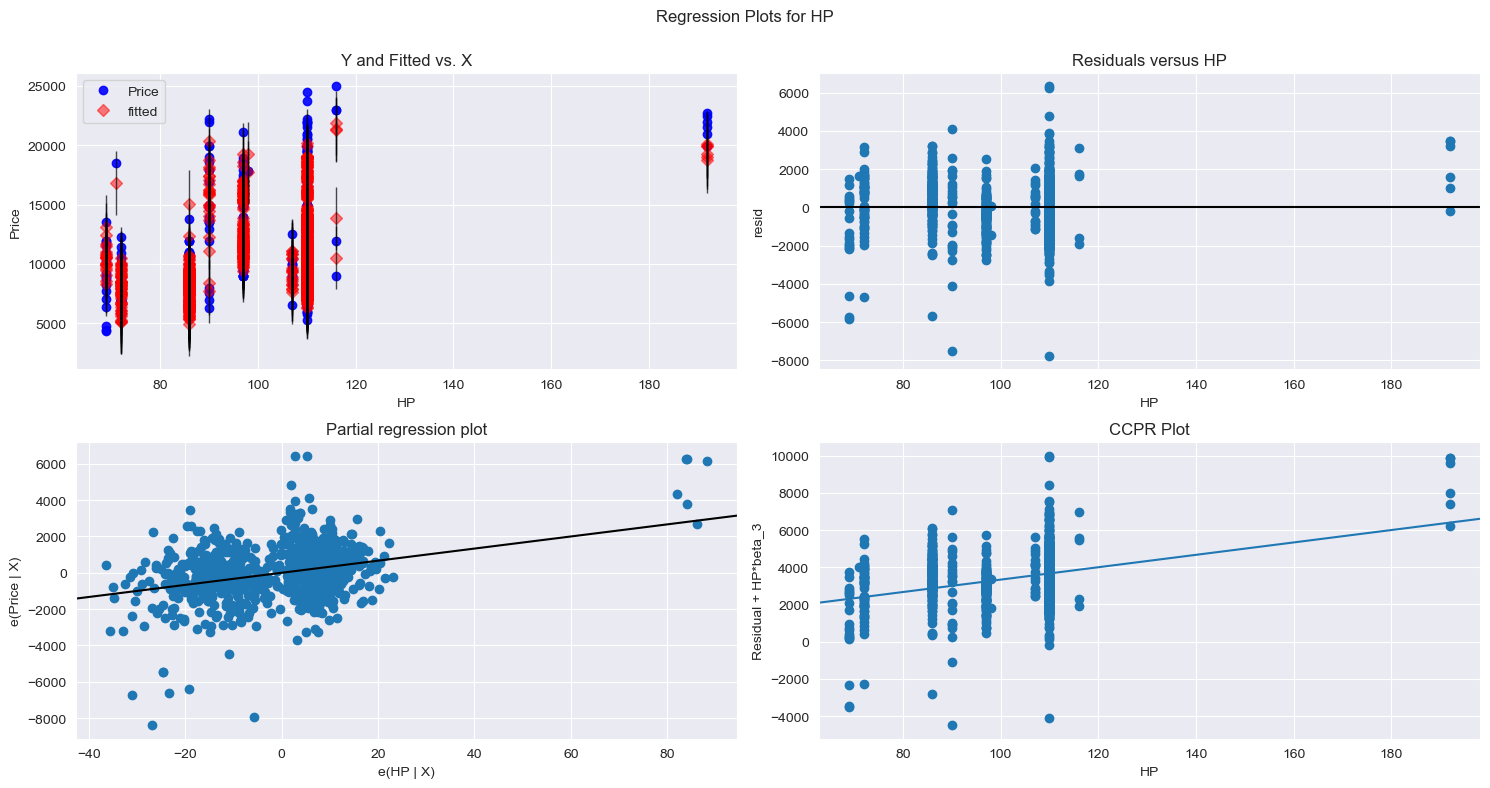

In [45]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

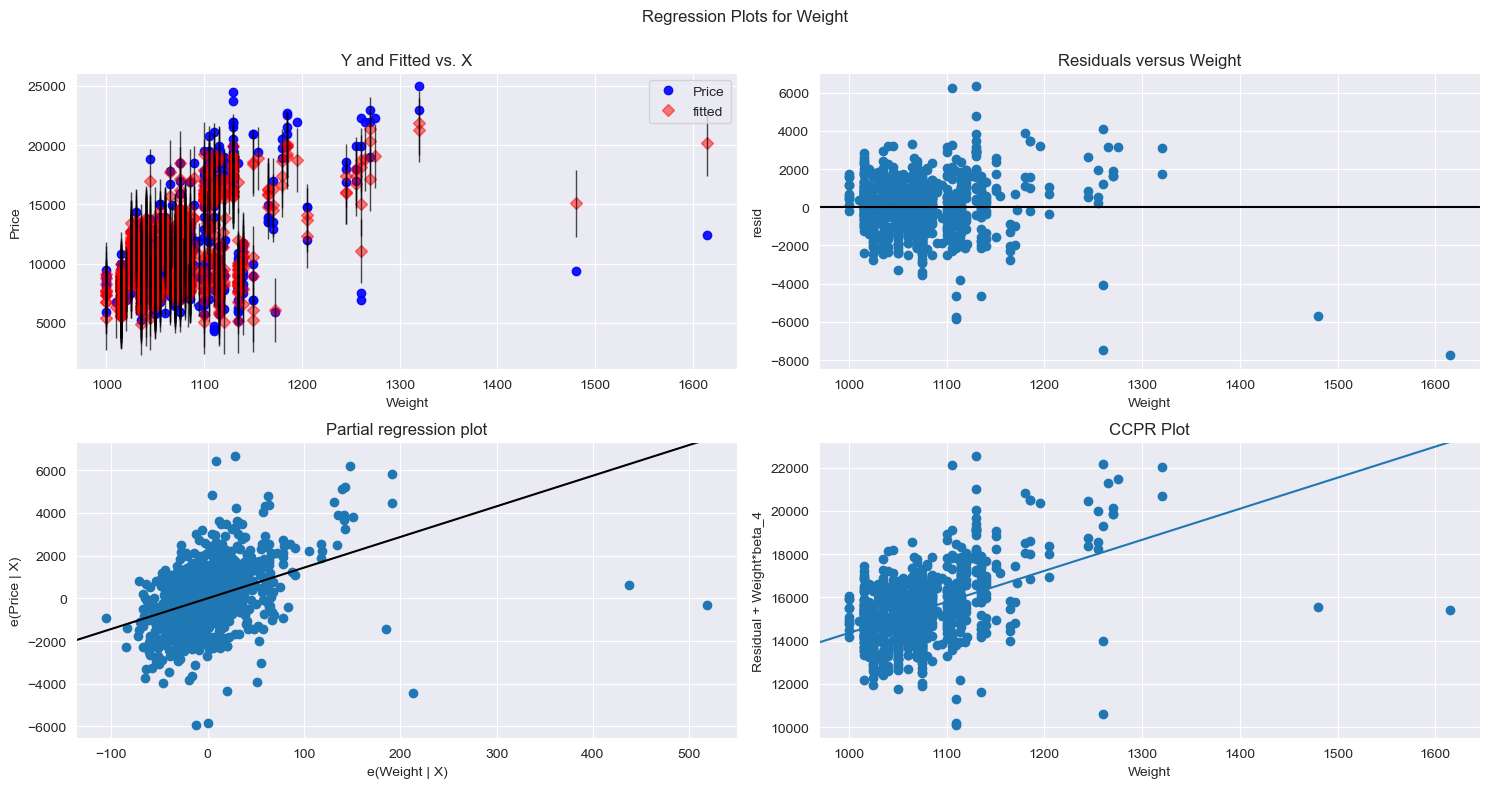

In [47]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [49]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

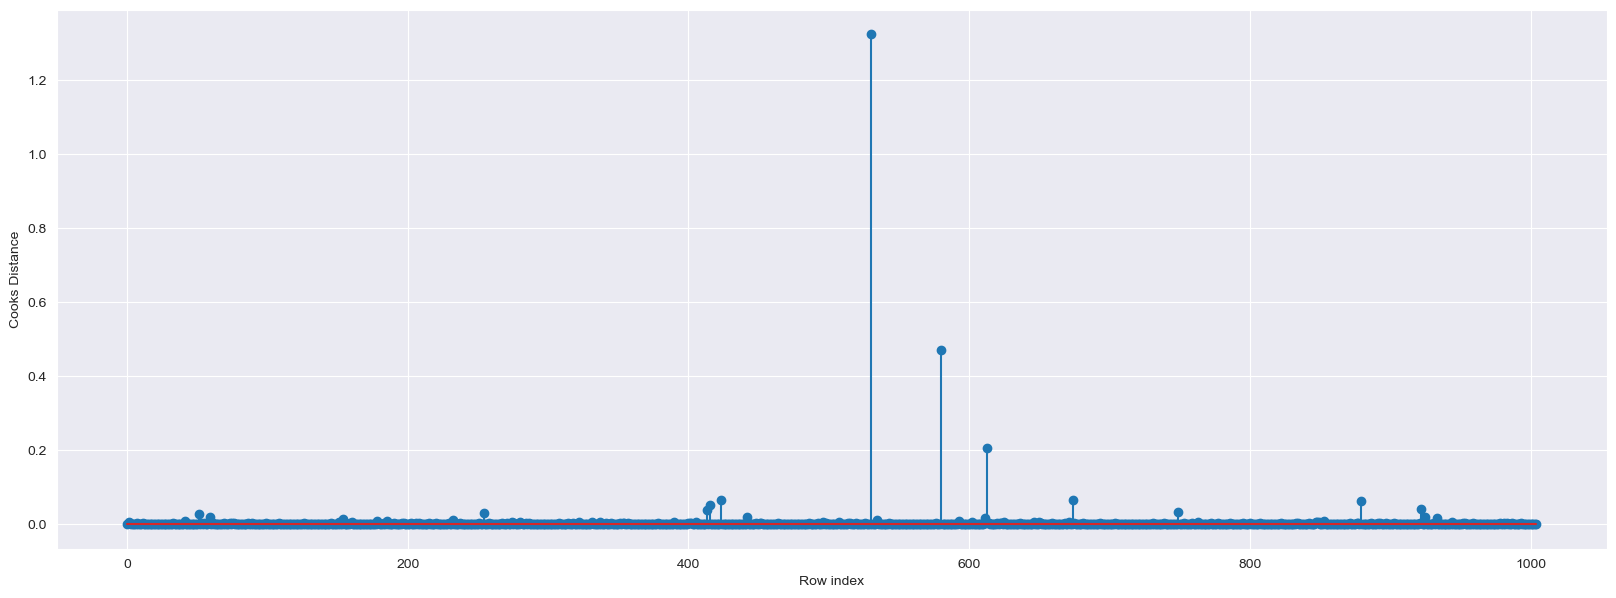

In [51]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(train)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(530, 1.3235401241016038)

## High Influence points

In [55]:
k = train.shape[1]
n = train.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.01791044776119403

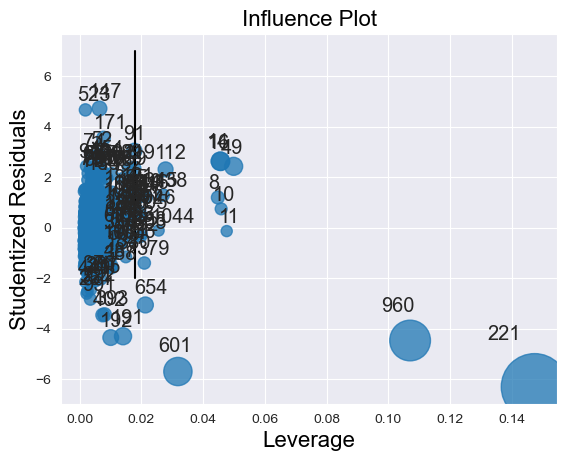

In [57]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
influence_plot(model)
y=[i for i in range (-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,color='black')
plt.show()

# Improving the model

In [59]:
#Discard the data points which are influencers and reasign the row number (reset_index())
train_new=train.drop(train.index[[530, 221, 960, 601]],axis=0).reset_index(drop=True)

In [61]:
train_new

,Price,Age,KM,HP,Weight
0,9450,79,60142,110,1050
1,10500,78,47400,86,1040
2,9000,48,119742,110,1080
3,9950,48,48071,97,1025
4,10750,54,115558,110,1035
...,...,...,...,...,...
996,14750,40,80425,90,1205
997,9900,53,57475,110,1040
998,9550,54,46856,97,1060
999,7900,70,85000,110,1055


# Build Model

In [63]:
model2= smf.ols('Price~Age+KM+HP+Weight',data = train_new).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1493.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:05:16   Log-Likelihood:                -8621.4
No. Observations:                1001   AIC:                         1.725e+04
Df Residuals:                     996   BIC:                         1.728e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2511.7687   1225.418     -2.050      0.041   -4916.465    -107.072
Age         -124.3876      3.165    -39.306      0.000    -130.598    -118.178
KM            -0.0187      0.001    -12.668      0.000      -0.022      -0.016
HP            33.0380      3.127     10.565      0.000      26.901      39.175
Weight        16.8959      1.061     15.927      0.000      14.814      18.978
==============================================================================
Omnibus:                       94.924   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.197
Skew:                          -0.254   Prob(JB):                    7.21e-106
Kurtosis:                       6.369   Cond. No.                     2.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
model2.resid.mean()

-2.8036314457725663e-09

<Axes: ylabel='Density'>

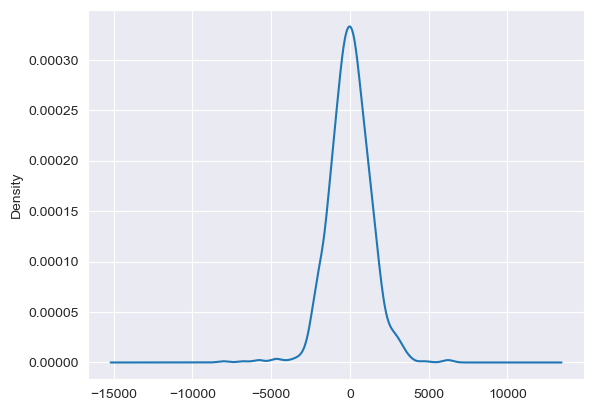

In [67]:
model2.resid.plot(kind='kde')

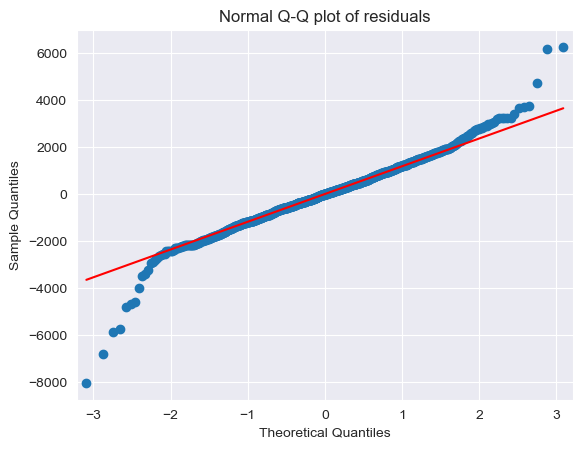

In [69]:
import statsmodels.api as sm
qqplot=sm.qqplot(model2.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

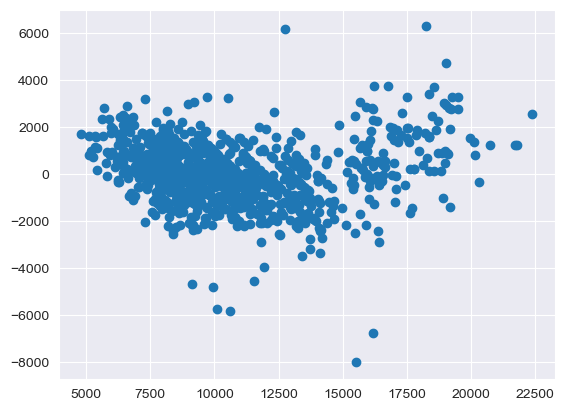

In [71]:
plt.scatter(model2.fittedvalues,model2.resid)

# Cook’s Distance

In [73]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

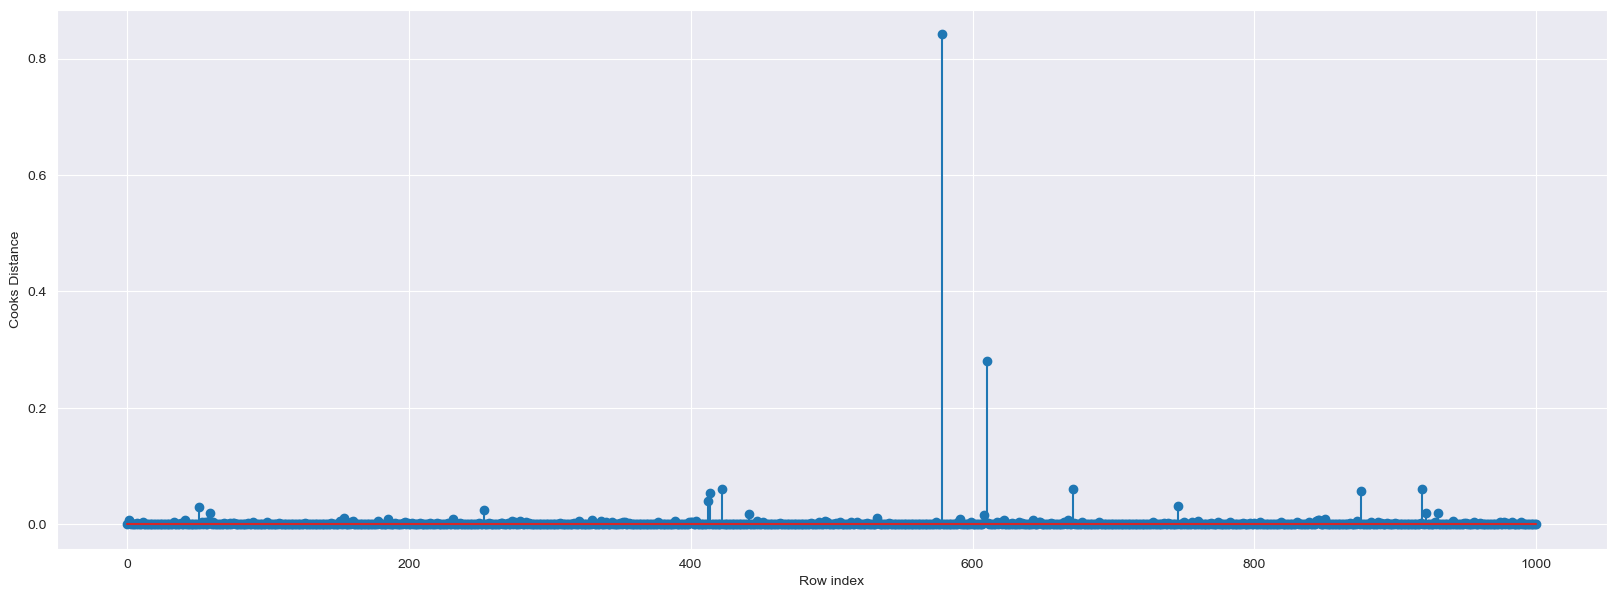

In [75]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(train_new)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [79]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(578, 0.8421578777572138)

In [81]:
k = train_new.shape[1]
n = train_new.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.017982017982017984

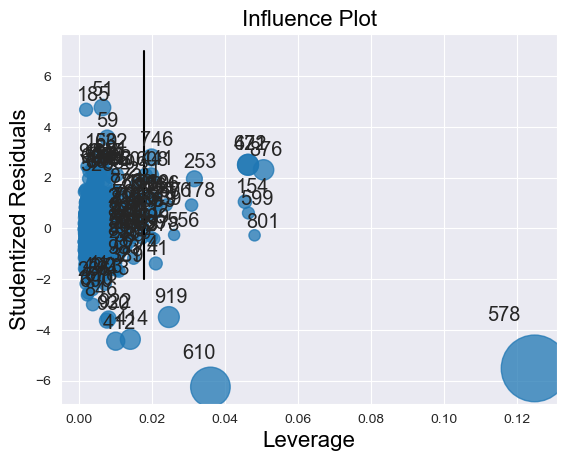

In [83]:
influence_plot(model2)
y=[i for i in range (-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,color='black')
plt.show()

In [85]:
train_new1=train_new.drop(train_new.index[[578, 599, 610, 672, 876, 919]],axis=0).reset_index(drop=True)

In [87]:
train_new1

,Price,Age,KM,HP,Weight
0,9450,79,60142,110,1050
1,10500,78,47400,86,1040
2,9000,48,119742,110,1080
3,9950,48,48071,97,1025
4,10750,54,115558,110,1035
...,...,...,...,...,...
990,14750,40,80425,90,1205
991,9900,53,57475,110,1040
992,9550,54,46856,97,1060
993,7900,70,85000,110,1055


In [89]:
model3= smf.ols('Price~Age+KM+HP+Weight',data = train_new1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1613.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:06:57   Log-Likelihood:                -8523.0
No. Observations:                 995   AIC:                         1.706e+04
Df Residuals:                     990   BIC:                         1.708e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6585.9736   1278.940     -5.150      0.000   -9095.718   -4076.229
Age         -116.3198      3.137    -37.082      0.000    -122.475    -110.164
KM            -0.0217      0.001    -15.034      0.000      -0.025      -0.019
HP            27.9031      3.132      8.909      0.000      21.757      34.049
Weight        20.9751      1.116     18.799      0.000      18.786      23.165
==============================================================================
Omnibus:                       50.861   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.505
Skew:                           0.044   Prob(JB):                     3.48e-38
Kurtosis:                       5.038   Cond. No.                     2.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
model3.resid.mean()

-2.2238123507926888e-09

<Axes: ylabel='Density'>

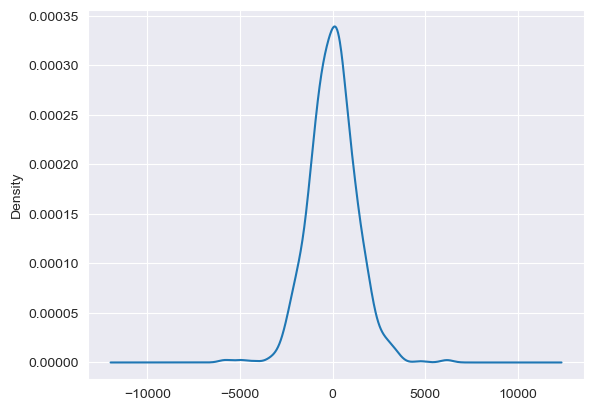

In [93]:
model3.resid.plot(kind='kde')

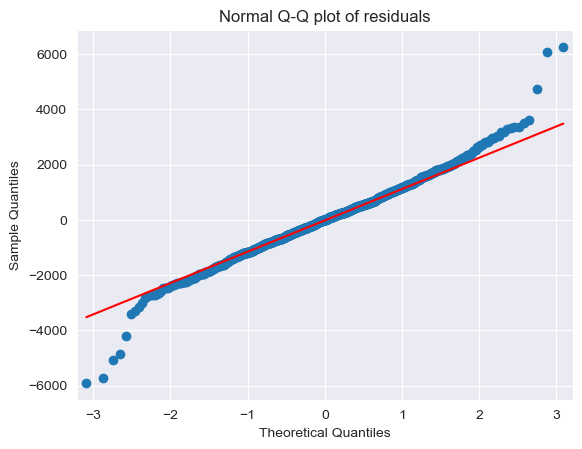

In [95]:
import statsmodels.api as sm
qqplot=sm.qqplot(model3.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

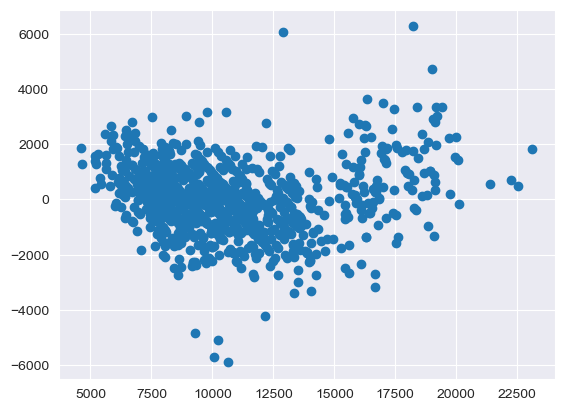

In [97]:
plt.scatter(model3.fittedvalues,model3.resid)

In [99]:
model3_influence = model3.get_influence()
(c, _) = model3_influence.cooks_distance

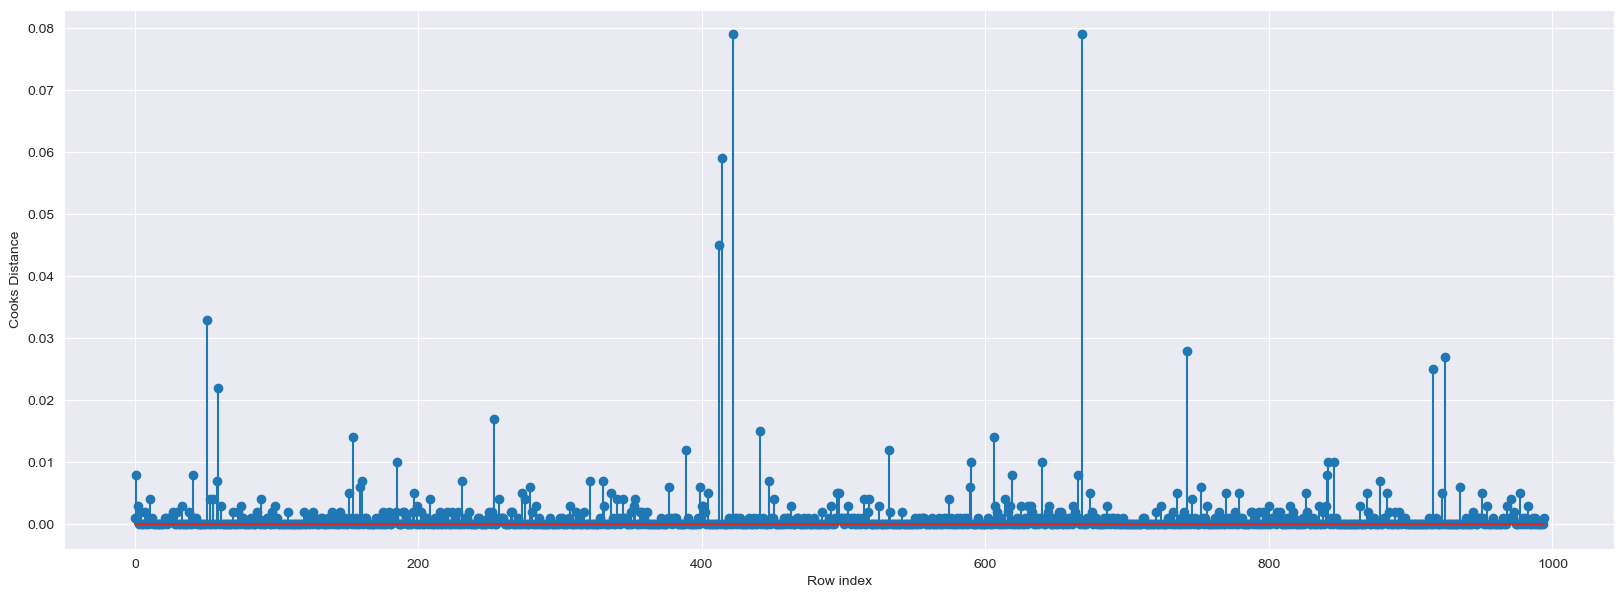

In [101]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(train_new1)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

Here all the cook's distance is less than 0.5 so we stop the process here and assume that there are no influential observation.

In model 3 all the assumptions of multiple linnear regression satisfied so we going forward to cross validation method.

## 4. Cross validation

In [103]:
import statsmodels.formula.api as smf
model3=smf.ols("Price~Age+KM+HP+Weight",data=train_new1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1613.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:07:35   Log-Likelihood:                -8523.0
No. Observations:                 995   AIC:                         1.706e+04
Df Residuals:                     990   BIC:                         1.708e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6585.9736   1278.940     -5.150      0.000   -9095.718   -4076.229
Age         -116.3198      3.137    -37.082      0.000    -122.475    -110.164
KM            -0.0217      0.001    -15.034      0.000      -0.025      -0.019
HP            27.9031      3.132      8.909      0.000      21.757      34.049
Weight        20.9751      1.116     18.799      0.000      18.786      23.165
==============================================================================
Omnibus:                       50.861   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.505
Skew:                           0.044   Prob(JB):                     3.48e-38
Kurtosis:                       5.038   Cond. No.                     2.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
def rmse(errors):
    return np.sqrt((errors*errors).mean())

In [107]:
tr_errors=model3.resid
tr_rmse=rmse(tr_errors)
print(round(tr_rmse,2),"training RMSE")

1270.15 training RMSE


In [109]:
test

,Price,Age,KM,HP,Weight
635,8750,68,125000,72,1115
777,8950,68,77029,86,1015
858,7995,62,64797,110,1075
71,12995,32,29198,97,1060
1315,8950,70,68000,86,1045
...,...,...,...,...,...
1235,7950,71,82700,110,1050
140,16450,20,22588,97,1110
160,18950,16,11000,110,1105
305,11895,41,39439,97,1060


In [111]:
test_errors=test.Price-model3.predict(test)
test_rmse=rmse(test_errors)
print(round(test_rmse,2),"test RMSE")

1273.83 test RMSE


In [113]:
print(tr_rmse,test_rmse)

1270.154763537255 1273.8258098037197


In [115]:
final_model=smf.ols("Price~Age+KM+HP+Weight",data= train_new1).fit()

## 5. Apply Lasso and Ridge 

In [117]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

y= Toyota3.iloc[:, 0] 
x= Toyota3.iloc[:,1:]

In [119]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 50)
x_train.shape, x_test.shape

((1005, 4), (431, 4))

In [121]:
from sklearn.linear_model import Ridge

# Train the model 
ridge = Ridge(alpha = 1) 
ridge.fit(x_train, y_train) 
y_pred = ridge.predict(x_test) 
y_pred_train=ridge.predict(x_train)

# calculate mean square error 
root_mean_squared_error_ridge_test = np.sqrt(((y_pred - y_test)**2).mean())
root_mean_squared_error_ridge_train= np.sqrt(((y_pred_train - y_train)**2).mean())

print("RMSE for train:", root_mean_squared_error_ridge_train)
print("RMSE for test:", root_mean_squared_error_ridge_test)

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridge.coef_) 
print(ridge_coefficient) 

RMSE for train: 1371.7047656195043
RMSE for test: 1292.3691105679213
  Columns  Coefficient Estimate
0     Age           -123.361636
1      KM             -0.020064
2      HP             29.862238
3  Weight             18.560615


In [123]:
from sklearn.linear_model import Lasso

# Train the model 
Lasso = Lasso(alpha = 1) 
Lasso.fit(x_train, y_train) 
y_pred = Lasso.predict(x_test) 
y_pred_train=Lasso.predict(x_train)

# calculate mean square error 
root_mean_squared_error_lasso_test = np.sqrt(((y_pred - y_test)**2).mean())
root_mean_squared_error_lasso_train= np.sqrt(((y_pred_train - y_train)**2).mean())

print("RMSE for train:", root_mean_squared_error_lasso_train)
print("RMSE for test:", root_mean_squared_error_lasso_test)

# get lasso coefficient and print them 
Lasso_coefficient = pd.DataFrame() 
Lasso_coefficient["Columns"]= x_train.columns 
Lasso_coefficient['Coefficient Estimate'] = pd.Series(Lasso.coef_) 
print(Lasso_coefficient)

RMSE for train: 1371.7047692034262
RMSE for test: 1292.3677587749785
  Columns  Coefficient Estimate
0     Age           -123.357404
1      KM             -0.020066
2      HP             29.856901
3  Weight             18.561020


##### From this Lasso and Ridge regularization, we conclude that the KM feature does not contribute much to the model in predicting the price of the car. From these coefficients, we can say that Age contributes the most to predicting Price followed by HP and Weight respectively.

## 6. Interview question

##### 1. What is Normalization & Standardization and how is it helpful?

Normalization and standardization are techniques used in data preprocessing to scale and center features in a dataset. They are crucial steps in preparing data for many machine learning algorithms, as they can impact the performance and convergence of models.

#### Normalization:

Normalization refers to the process of scaling data to fit within a specific range, often [0, 1]. This is also known as min-max scaling.

#### Formula:

Normalization= (x-x.min())/(x.max()-x.min())

#### Standardization:

Standardization or Z-score normalization refers to the process of centering the data around the mean and scaling it according to the standard deviation. This transforms the data to have a mean of 0 and a standard deviation of 1. It generally lies between [-3.4, 3.4].

#### Formula:
Standardization= (x-x.mean())/x.std()

They are useful in various ways like;

i) Remove the units and scales of data.

ii) Handle outliers in a data.

iii) Prevent dominance of single feature in a data.

iv) Improves model perfomance.

##### 2. What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs in multiple linear regression when two or more predictor variables are highly correlated, which can lead to unstable estimates of coefficients and difficulties in determining the effect of each predictor. Here are several techniques to address multicollinearity:

##### i. Remove Highly Correlated Predictors

Variance Inflation Factor (VIF): Calculate VIF for each predictor. A VIF value greater than 10 is often considered indicative of high multicollinearity. Remove variables with high VIF values.

##### ii. Regularization Techniques

Ridge Regression: Adds L2 regularization to the regression model. It penalizes large coefficients and can handle multicollinearity by shrinking coefficients of correlated variables.

Lasso Regression: Adds L1 regularization to the model. It can set some coefficients to zero, effectively performing feature selection and reducing multicollinearity.

##### iii. Principal Component Analysis (PCA):

Transforms the predictors into orthogonal components, which can help with multicollinearity.